In [ ]:
## breakdown of which voter/value groups like Johnson compared to other Con/Lab party leaders

In [1]:
dataset_name = "W19_comb"
df_list = 'BES_Panel'

#'BES_Panel|BES_reduced_with_na'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}



Toggle code

In [7]:
search(BES_Panel,"likeJohnson")
search(BES_reduced_with_na,"likeJohnson")

likeJohnsonW7__Strongly like     29186
likeJohnsonW8__Strongly like     31816
likeJohnsonW9__Strongly like     28925
likeJohnsonW13__Strongly like    14157
likeJohnsonW14__Strongly like     6898
likeJohnsonW15__Strongly like    29245
likeJohnsonW17__Strongly like    32781
likeJohnsonW18__Strongly like    36471
likeJohnsonW19__Strongly like    31225
dtype: int64

In [8]:
BES_reduced_with_na["likeJohnsonW17__Strongly like"]

id
1        NaN
2        7.0
3        NaN
4        NaN
5        NaN
        ... 
98447    0.0
98448    5.0
98449    4.0
98450    3.0
98451    7.0
Name: likeJohnsonW17__Strongly like, Length: 97006, dtype: float32

MSE: 3.51, MAE: 1.33, EV: 0.74, R2: 0.72


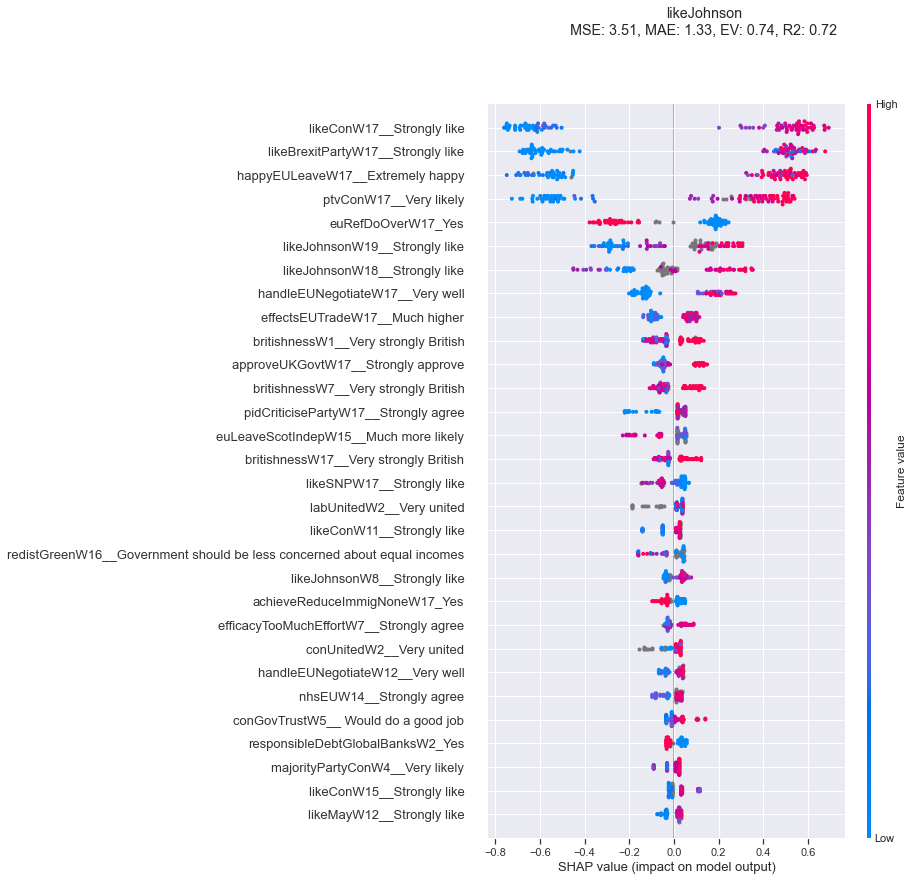

In [14]:
# df_simp = BES_constituency_aggregates.drop(['pano','constituency_name','Con17'],axis=1)\
#     .drop(search(BES_constituency_aggregates,"|".join(["winConstituency","profile_past","ashcroft","partyContact",
#                                                        "partyId","localElection","localTurnout","^map",
#                                                        "generalElectionVote","euroElectionVote",
#                                                        "^prefer[^M]","ptv"])).index,axis=1)
# df_simp["Con17_elec"] = BES_census_data["Con17_elec"].values

var_stub = "likeJohnsonW17__Strongly like"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = BES_reduced_with_na[var_stub].notnull()
wt_cols = []
min_features = 30
colname = "likeJohnson"
dependence_plots = False

alg = get_xgboost_alg(classification_problem=False)
title = "likeJohnson"

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=BES_reduced_with_na[mask].drop(wt_cols,axis=1)[0:100],
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
            min_features = min(BES_reduced_with_na.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

,turnoutUKGeneralW1__Very likely that I will vote,turnoutUKGeneralW2__Very likely that I will vote,turnoutUKGeneralW3__Very likely that I will vote,turnoutUKGeneralW4__Very likely that I will vote,turnoutUKGeneralW5__Very likely that I will vote,turnoutUKGeneralW7__Very likely that I will vote,turnoutUKGeneralW8__Very likely that I will vote,turnoutUKGeneralW9__Very likely that I will vote,turnoutUKGeneralW10__Very likely that I will vote,turnoutUKGeneralW11__Very likely that I will vote,...,partyContactLabW3_Yes,responsibleNHSLabourW3_Yes,responsibleNHSLibDemsW3_Yes,responsibleNHSNoneW3_Yes,responsibleEducationLabW3_Yes,responsibleEducationNoneW3_Yes,achieveReduceImmigLabW18_Yes,achieveReduceImmigConW18_Yes,partyContactConW3_Yes,partyContact1W3_Yes
id,,,,,,,,,,,,,,,,,,,,,
2,4.0,NaN,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,...,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0
6,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,4.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
7,3.0,4.0,NaN,4.0,3.0,4.0,4.0,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,4.0,4.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0
15,NaN,4.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0
373,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
376,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
BES_Panel["euroElectionVoteW16"].value_counts()

Brexit Party                                9243
Liberal Democrat                            5392
Green Party                                 3543
Labour                                      2515
Conservative                                1716
Scottish National Party (SNP)                945
Change UK- The Independent Group             883
Other                                        526
United Kingdom Independence Party (UKIP)     399
Don't know                                   381
Plaid Cymru                                  294
Name: euroElectionVoteW16, dtype: int64

In [19]:
EE2019Brexit = BES_Panel["euroElectionVoteW16"]=="Brexit Party"

In [23]:
search(BES_Panel,"p_past")

p_past_vote_2010    63151
p_past_vote_2005    55846
p_past_vote_2015    71128
p_past_vote_2017    60377
p_past_vote_2019    28345
dtype: int64

In [25]:
BES_Panel["p_past_vote_2017"].value_counts()

Labour                                      23742
Conservative                                23741
Liberal Democrat                             5258
Scottish National Party (SNP)                2523
United Kingdom Independence Party (UKIP)     1498
Green Party                                  1289
Don't know                                   1204
Other                                         726
Plaid Cymru                                   395
British National Party (BNP)                    1
Name: p_past_vote_2017, dtype: int64

In [27]:
BES_Panel["p_past_vote_2017"][EE2019Brexit].value_counts()

Conservative                                6321
Labour                                      1294
United Kingdom Independence Party (UKIP)     519
Liberal Democrat                             177
Other                                        135
Don't know                                   121
Green Party                                   73
Scottish National Party (SNP)                 67
Plaid Cymru                                   42
British National Party (BNP)                   0
Name: p_past_vote_2017, dtype: int64

In [26]:
BES_Panel["p_past_vote_2019"].value_counts()

Conservative                     12695
Labour                            8264
Liberal Democrat                  3582
Scottish National Party (SNP)     1252
Green Party                        863
Brexit Party                       722
Other                              552
Don't know                         232
Plaid Cymru                        183
Name: p_past_vote_2019, dtype: int64

In [33]:
BES_Panel["likeJohnsonW17"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).groupby(BES_Panel["p_past_vote_2019"]).mean()

p_past_vote_2019
Conservative                     7.297596
Labour                           1.350505
Liberal Democrat                 1.887196
Scottish National Party (SNP)    1.001198
Plaid Cymru                      2.031250
Green Party                      2.353821
Other                            3.820375
Brexit Party                     6.207510
Don't know                       3.539568
dtype: float64

In [41]:

BES_Panel["likeJohnsonW17"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).groupby(BES_Panel["p_past_vote_2017"].astype('object')+BES_Panel["euroElectionVoteW16"].astype('object')).mean().replace(0,np.nan).dropna().sort_values().tail(20)

Plaid CymruBrexit Party                                                              5.961538
ConservativeOther                                                                    5.967213
OtherBrexit Party                                                                    6.181818
United Kingdom Independence Party (UKIP)United Kingdom Independence Party (UKIP)     6.200000
Liberal DemocratBrexit Party                                                         6.240385
OtherUnited Kingdom Independence Party (UKIP)                                        6.333333
OtherChange UK- The Independent Group                                                6.500000
United Kingdom Independence Party (UKIP)Change UK- The Independent Group             6.600000
Don't knowBrexit Party                                                               6.638889
Green PartyBrexit Party                                                              6.666667
Scottish National Party (SNP)United Kingdom Independence Par

In [43]:
BES_Panel["likeJohnsonW17"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).groupby(BES_Panel["p_past_vote_2017"].astype('object')+BES_Panel["euroElectionVoteW16"].astype('object')).count().sort_values()

Plaid CymruUnited Kingdom Independence Party (UKIP)       0
Green PartyPlaid Cymru                                    0
Scottish National Party (SNP)Conservative                 1
Green PartyDon't know                                     1
Green PartyUnited Kingdom Independence Party (UKIP)       1
                                                       ... 
ConservativeConservative                                911
LabourGreen Party                                      1096
LabourLabour                                           1245
LabourLiberal Democrat                                 1310
ConservativeBrexit Party                               3830
Length: 96, dtype: int64

In [59]:
combo_count = BES_Panel["likeJohnsonW17"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).groupby(BES_Panel["p_past_vote_2017"].astype(str).fillna('?')+BES_Panel["euroElectionVoteW16"].astype(str).fillna('?')).count()

In [60]:
BES_Panel["likeJohnsonW17"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).groupby(BES_Panel["p_past_vote_2017"].astype(str).fillna('?')+BES_Panel["euroElectionVoteW16"].astype(str).fillna('?')).mean()[combo_count>50].sort_values()

LabourScottish National Party (SNP)                           0.584615
Scottish National Party (SNP)Scottish National Party (SNP)    0.687980
LabourGreen Party                                             0.949818
LabourLiberal Democrat                                        1.004580
LabourPlaid Cymru                                             1.026316
Scottish National Party (SNP)?                                1.182163
LabourLabour                                                  1.338956
Liberal DemocratGreen Party                                   1.385542
?Liberal Democrat                                             1.403941
Green PartyGreen Party                                        1.424242
Liberal DemocratLiberal Democrat                              1.428571
LabourChange UK- The Independent Group                        1.694561
?Green Party                                                  1.755396
Liberal DemocratChange UK- The Independent Group              1.846154
Labour

In [54]:
BES_Panel["euroElectionVoteW16"].astype(str).fillna('nan').value_counts(dropna=False)

nan                                         71169
Brexit Party                                 9243
Liberal Democrat                             5392
Green Party                                  3543
Labour                                       2515
Conservative                                 1716
Scottish National Party (SNP)                 945
Change UK- The Independent Group              883
Other                                         526
United Kingdom Independence Party (UKIP)      399
Don't know                                    381
Plaid Cymru                                   294
Name: euroElectionVoteW16, dtype: int64

In [2]:
likeJohnson = BES_Panel[["likeJohnsonW17","likeJohnsonW18","likeJohnsonW19"]].replace("Don't know",np.nan).fillna(method='bfill',axis=1)["likeJohnsonW17"].cat.codes.replace(-1,np.nan)

likeJohnson18 = BES_Panel["likeJohnsonW18"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

likeCon = BES_Panel[["likeConW17","likeConW18","likeConW19"]].replace("Don't know",np.nan).fillna(method='bfill',axis=1)["likeConW17"].cat.codes.replace(-1,np.nan)

likeMay = BES_Panel[["likeMayW11","likeMayW12","likeMayW13"]].replace("Don't know",np.nan).fillna(method='bfill',axis=1)["likeMayW11"].cat.codes.replace(-1,np.nan)

likeMay12 = BES_Panel["likeMayW12"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

In [228]:
search(BES_Panel,"likeMay")

likeMayW9     30036
likeMayW10    30237
likeMayW11    30956
likeMayW12    34394
likeMayW13    31136
likeMayW14    31063
likeMayW15    30842
likeMayW16    37959
dtype: int64

In [71]:
vote_combo = BES_Panel["p_past_vote_2017"].astype(str).fillna('?')+\
    "|"+BES_Panel["euroElectionVoteW16"].astype(str).fillna('?')+\
    "|"+BES_Panel["p_past_vote_2019"].astype(str).fillna('?')

In [74]:
vote_combo.value_counts()[vote_combo.value_counts()>50]

?|?|?                                                      33768
Labour|?|?                                                 10282
Conservative|?|?                                            8428
Conservative|?|Conservative                                 4421
Conservative|Brexit Party|Conservative                      3796
                                                           ...  
Conservative|?|Green Party                                    54
?|Liberal Democrat|Labour                                     53
United Kingdom Independence Party (UKIP)|?|Brexit Party       53
Other|Brexit Party|Conservative                               53
Labour|Don't know|?                                           53
Length: 97, dtype: int64

In [ ]:
# likeJohnson.groupby(vote_combo).apply(lambda x: (round(x.mean(),2),round(x.std(),2),"N="+str(len(x))))

In [81]:
meanBoris = likeJohnson.cat.codes.replace(-1,np.nan).groupby(vote_combo)\
    .apply(lambda x: (round(x.mean(),2),round(x.std(),2),"N="+str(len(x)))).loc[vote_combo.value_counts()[vote_combo.value_counts()>50].index]

In [96]:
meanBoris.loc[meanBoris.apply(lambda x: x[0]).sort_values(ascending=False).index].head(50)


Conservative|Brexit Party|Conservative                                (7.94, 1.92, N=3796)
Conservative|Brexit Party|?                                            (7.73, 2.1, N=2249)
?|Brexit Party|Conservative                                              (7.7, 1.9, N=178)
Conservative|United Kingdom Independence Party (UKIP)|?                 (7.69, 2.48, N=72)
Conservative|United Kingdom Independence Party (UKIP)|Conservative       (7.5, 2.48, N=84)
United Kingdom Independence Party (UKIP)|?|Conservative                (7.46, 2.41, N=201)
Conservative|?|Conservative                                           (7.38, 2.25, N=4421)
Liberal Democrat|Brexit Party|Conservative                               (7.37, 2.0, N=68)
United Kingdom Independence Party (UKIP)|Brexit Party|Conservative     (7.33, 2.09, N=208)
Labour|Brexit Party|Conservative                                       (7.21, 2.12, N=398)
Conservative|Brexit Party|Brexit Party                                 (7.04, 2.14, N=178)

In [99]:
((BES_Panel["p_past_vote_2017"]=="Labour")&(BES_Panel["p_past_vote_2019"]=="Conservative")).sum()

1075

In [101]:
likeJohnson.cat.codes.replace(-1,np.nan)[((BES_Panel["p_past_vote_2017"]=="Labour")&(BES_Panel["p_past_vote_2019"]=="Conservative"))].mean()

6.715089034676663

In [102]:
likeJohnson.cat.codes.replace(-1,np.nan)[((BES_Panel["p_past_vote_2019"]=="Conservative"))].mean()

7.327633974511201

In [104]:
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

In [106]:
search(pan_dataset_votes,"2019")

2019GEVote             31784
2019GEVote_complete    97006
2019GEVote_simple      96529
2019EEVote             47902
2019EEVote_complete    97006
2019EEVote_simple      96529
2019LE                 23403
2019LE_complete        97006
2019LE_simple          96529
dtype: int64

In [152]:
vote_2017_EE_2019 = pan_dataset_votes[["2017GEVote_complete","2019EEVote_complete","2019GEVote_complete"]].replace({"BXP":"BXP&UKIP","UKIP":"BXP&UKIP"}).apply(lambda x: "|".join(x),axis=1)

vote_2019 = pan_dataset_votes["2019GEVote_complete"].replace({"BXP":"BXP&UKIP","UKIP":"BXP&UKIP"})
vote_2017_2019 = pan_dataset_votes[["2017GEVote_complete","2019GEVote_complete"]].replace({"BXP":"BXP&UKIP","UKIP":"BXP&UKIP"}).apply(lambda x: "|".join(x),axis=1)


In [196]:
(pan_dataset_votes["2017GEVote_complete"].isin(["LAB","LD"])&pan_dataset_votes["2019GEVote_complete"].isin(["CON"])).sum()

1343

In [115]:
vote_combo[likeJohnson.notnull()].value_counts()

CON|BXP&UKIP|CON    5263
CON|BXP&UKIP|UNK    2391
LAB|LAB|LAB         1745
CON|DNV|CON         1392
LAB|LD|LAB          1304
                    ... 
OTH|TIG|CON            1
CON|OTH|DK             1
DK|CON|UNK             1
PC|LAB|LAB             1
TYTV(Def)|TIG|LD       1
Length: 858, dtype: int64

In [190]:
meanBoris = likeJohnson.groupby(vote_combo)\
    .apply(lambda x: (round(x.mean(),2),round(x.std(),2),"N="+str(len(x)))).loc[vote_combo.value_counts()[vote_combo.value_counts()>100].index]
meanBoris.loc[meanBoris.apply(lambda x: x[0]).sort_values(ascending=False).index].head(50)

CON|BXP&UKIP|CON                (7.97, 1.9, N=5266)
CON|BXP&UKIP|UNK               (7.84, 2.02, N=3324)
DNV|BXP&UKIP|CON                (7.65, 1.93, N=231)
CON|UNK|CON                    (7.38, 2.16, N=1130)
BXP&UKIP|BXP&UKIP|CON           (7.31, 2.18, N=331)
LD|BXP&UKIP|CON                 (7.26, 2.07, N=104)
LAB|BXP&UKIP|CON                (7.12, 2.23, N=545)
CON|CON|CON                    (7.05, 2.33, N=1239)
CON|BXP&UKIP|BXP&UKIP           (6.93, 2.23, N=230)
CON|DNV|CON                    (6.92, 2.34, N=1402)
LAB|UNK|CON                      (6.9, 2.41, N=146)
BXP&UKIP|BXP&UKIP|UNK            (6.85, 2.5, N=311)
CON|CON|UNK                     (6.85, 2.33, N=845)
DNV|DNV|CON                     (6.84, 2.42, N=270)
DNV|UNK|CON                     (6.82, 2.63, N=115)
BXP&UKIP|UNK|UNK                (6.75, 2.65, N=348)
LAB|DNV|CON                     (6.68, 2.36, N=192)
DNV|BXP&UKIP|UNK                (6.57, 2.45, N=249)
CON|OTH|CON                     (6.53, 2.27, N=117)
CON|UNK|UNK 

In [191]:
meanCon = likeCon.groupby(vote_combo)\
    .apply(lambda x: (round(x.mean(),2),round(x.std(),2),"N="+str(len(x)))).loc[vote_combo.value_counts()[vote_combo.value_counts()>100].index]
meanCon.loc[meanCon.apply(lambda x: x[0]).sort_values(ascending=False).index].head(50)

CON|CON|CON                    (7.97, 1.67, N=1239)
CON|CON|UNK                     (7.82, 1.74, N=845)
CON|BXP&UKIP|CON               (7.73, 1.84, N=5266)
CON|UNK|CON                    (7.68, 1.81, N=1130)
CON|BXP&UKIP|UNK                (7.63, 1.9, N=3324)
CON|DNV|CON                    (7.31, 1.93, N=1402)
CON|UNK|UNK                     (6.9, 2.22, N=5121)
CON|OTH|CON                     (6.74, 2.03, N=117)
CON|DNV|UNK                    (6.74, 2.17, N=1315)
DNV|BXP&UKIP|CON                 (6.7, 2.12, N=231)
CON|BXP&UKIP|BXP&UKIP           (6.56, 1.94, N=230)
CON|LD|CON                      (6.56, 1.82, N=320)
CON|TIG|CON                      (6.5, 2.24, N=108)
CON|GP|CON                      (6.46, 1.71, N=116)
BXP&UKIP|BXP&UKIP|CON           (6.41, 2.24, N=331)
DNV|UNK|CON                     (6.36, 2.29, N=115)
DNV|DNV|CON                     (6.33, 2.32, N=270)
LD|BXP&UKIP|CON                  (6.21, 1.9, N=104)
CON|OTH|UNK                      (6.09, 2.4, N=101)
LAB|UNK|CON 

In [192]:
likeBorisMoreThanCon = likeJohnson - likeCon

In [193]:
meanBorisMoreThanCon = likeBorisMoreThanCon.groupby(vote_combo)\
    .apply(lambda x: (round(x.mean(),2),round(x.std(),2),"N="+str(len(x)))).loc[vote_combo.value_counts()[vote_combo.value_counts()>100].index]
meanBorisMoreThanCon.loc[meanBorisMoreThanCon.apply(lambda x: x[0]).sort_values(ascending=False).index].head(50)

LAB|BXP&UKIP|BXP&UKIP           (1.95, 2.32, N=121)
LAB|BXP&UKIP|LAB                (1.61, 2.55, N=317)
BXP&UKIP|BXP&UKIP|BXP&UKIP      (1.51, 2.36, N=122)
LAB|BXP&UKIP|UNK                (1.47, 2.22, N=638)
LAB|BXP&UKIP|CON                (1.46, 2.01, N=545)
BXP&UKIP|BXP&UKIP|UNK           (1.34, 2.19, N=311)
DNV|BXP&UKIP|UNK                (1.17, 1.98, N=249)
BXP&UKIP|UNK|UNK                (1.16, 2.53, N=348)
LD|BXP&UKIP|CON                  (1.05, 1.8, N=104)
LAB|DNV|CON                     (0.98, 2.08, N=192)
DNV|BXP&UKIP|CON                (0.97, 1.97, N=231)
LAB|UNK|CON                     (0.96, 1.97, N=146)
BXP&UKIP|BXP&UKIP|CON            (0.9, 1.87, N=331)
TYTV(Maybe)|UNK|UNK              (0.83, 1.6, N=320)
LAB|DNV|DNV                      (0.7, 2.48, N=273)
OTH|UNK|UNK                     (0.69, 2.37, N=191)
LAB|UNK|DNV                     (0.62, 2.22, N=123)
UNK|UNK|UNK                   (0.56, 2.85, N=26029)
DNV|DNV|CON                     (0.52, 2.28, N=270)
DNV|DNV|DNV 

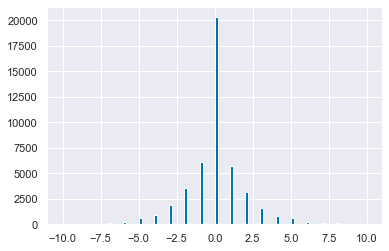

In [182]:
likeBorisMoreThanCon.hist(bins=100)

In [183]:
likeBorisMoreThanCon.mean()

-0.040265715022787855

In [119]:
likeJohnson.cat.codes.replace(-1,np.nan).groupby(pan_dataset_votes["2019GEVote_complete"]).apply(lambda x: (round(x.mean(),2),round(x.std(),2),"N="+str(len(x))))

2019GEVote_complete
BXP               (6.2, 2.58, N=722)
CON            (7.33, 2.27, N=12695)
DK               (3.43, 2.96, N=221)
GP               (2.25, 2.46, N=863)
LAB             (1.28, 2.14, N=8264)
LD              (1.83, 2.31, N=3582)
OTH              (3.68, 3.01, N=552)
PC               (1.97, 2.64, N=183)
SNP             (0.95, 1.93, N=1252)
DNV             (3.77, 3.26, N=3224)
TYTV(Def)            (nan, nan, N=0)
TYTV(Maybe)      (2.35, 2.84, N=226)
Not Present        (nan, nan, N=477)
UNK            (3.96, 3.56, N=64745)
dtype: object

In [121]:
likeJohnson.cat.codes.replace(-1,np.nan).groupby(vote_2019).apply(lambda x: (round(x.mean(),2),round(x.std(),2),"N="+str(len(x))))

2019GEVote_complete
BXP&UKIP          (6.2, 2.58, N=722)
CON            (7.33, 2.27, N=12695)
DK               (3.43, 2.96, N=221)
GP               (2.25, 2.46, N=863)
LAB             (1.28, 2.14, N=8264)
LD              (1.83, 2.31, N=3582)
OTH              (3.68, 3.01, N=552)
PC               (1.97, 2.64, N=183)
SNP             (0.95, 1.93, N=1252)
DNV             (3.77, 3.26, N=3224)
TYTV(Def)            (nan, nan, N=0)
TYTV(Maybe)      (2.35, 2.84, N=226)
Not Present        (nan, nan, N=477)
UNK            (3.96, 3.56, N=64745)
dtype: object

In [130]:
temp = likeJohnson.cat.codes.replace(-1,np.nan).groupby(vote_2017_2019).apply(lambda x: (round(x.mean(),2),round(x.std(),2),"N="+str(len(x))))
temp.loc[temp[temp.apply(lambda x: int(x[2].split("=")[1])>50)].apply(lambda x: x[0]).sort_values(ascending=False).index]

CON|CON                      (7.47, 2.2, N=9755)
BXP&UKIP|CON                 (7.38, 2.25, N=439)
DNV|CON                      (7.06, 2.35, N=686)
CON|BXP&UKIP                 (6.91, 2.26, N=267)
DK|CON                       (6.73, 2.33, N=149)
LAB|CON                     (6.72, 2.49, N=1075)
BXP&UKIP|UNK                 (6.72, 2.62, N=732)
GP|CON                        (6.69, 2.67, N=72)
CON|UNK                    (6.69, 2.77, N=11778)
OTH|CON                      (6.47, 2.43, N=120)
LD|CON                       (6.29, 2.53, N=268)
DNV|BXP&UKIP                   (6.21, 2.5, N=67)
BXP&UKIP|BXP&UKIP            (6.05, 2.65, N=146)
CON|DNV                      (5.59, 3.05, N=414)
BXP&UKIP|OTH                  (5.51, 2.59, N=53)
LAB|BXP&UKIP                  (5.3, 2.63, N=175)
BXP&UKIP|DNV                   (4.9, 3.21, N=64)
CON|OTH                      (4.53, 3.07, N=150)
DK|DNV                         (3.98, 3.5, N=52)
DK|UNK                       (3.97, 3.19, N=743)
OTH|UNK             

id
1             UNK
2             CON
3        BXP&UKIP
4             UNK
5             UNK
           ...   
98447         UNK
98448         UNK
98449         DNV
98450         UNK
98451         UNK
Name: 2019GEVote_complete, Length: 97006, dtype: category
Categories (14, object): ['BXP&UKIP', 'CON', 'DK', 'GP', ..., 'TYTV(Def)', 'TYTV(Maybe)', 'Not Present', 'UNK']

In [175]:
mask = BES_Panel["wt_new_W19_result"].notnull()
temp = pd.Series(list(zip(likeJohnson[mask].cat.codes.replace(-1,np.nan),BES_Panel["wt_new_W19_result"][mask]))).groupby(vote_2017_EE_2019[mask]).apply(lambda x: (round(weighted_mean(x),2),
#                                                                                                                                        round(x[0].std(),2),
                                                                                                                                       "N="+str(len(x))))
temp
temp.loc[temp[temp.apply(lambda x: int(x[1].split("=")[1])>100)].apply(lambda x: x[0]).sort_values(ascending=False).index]
                                                                                                                                              
                                                                                                            
                                                                                                                                        

LAB|GP|LAB            (4.6, N=285)
CON|LD|LD            (4.48, N=109)
LAB|DNV|LAB           (4.4, N=188)
LAB|UNK|LAB           (4.4, N=306)
DNV|DNV|DNV          (4.36, N=181)
LAB|LD|LD            (4.35, N=112)
LAB|BXP&UKIP|LAB     (4.26, N=105)
CON|UNK|CON          (4.25, N=460)
SNP|SNP|SNP          (4.15, N=356)
LAB|LAB|LAB          (4.07, N=605)
LD|LD|LD             (4.03, N=334)
CON|CON|CON          (3.99, N=426)
CON|BXP&UKIP|CON    (3.98, N=1750)
LAB|LD|LAB           (3.78, N=371)
LAB|BXP&UKIP|CON     (3.63, N=183)
CON|DNV|CON          (3.62, N=351)
dtype: object

In [177]:
# search(BES_Panel,"wt_new")

In [197]:
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')

In [205]:
pan_dataset_allr_values.set_index("id")[pan_dataset_allr_values.columns[1:3]]

,Economic: Left(0) <-> Right(200){uniform},Social: Liberalism(0) <-> Conservatism(200){uniform}
id,,
1,6.0,183.0
2,195.0,54.0
3,74.0,116.0
4,149.0,132.0
5,169.0,99.0
...,...,...
98447,118.0,57.0
98448,159.0,23.0
98449,42.0,49.0


In [200]:
likeJohnson.value_counts()

0.0     14318
8.0      4503
7.0      4486
10.0     4215
5.0      3869
6.0      3198
1.0      2989
2.0      2646
9.0      2635
3.0      2356
4.0      2002
dtype: int64

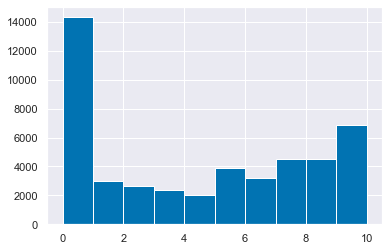

In [201]:
likeJohnson.hist()

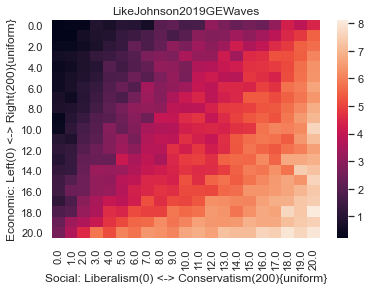

In [239]:
df = pd.concat([likeJohnson,pan_dataset_allr_values.set_index("id")[pan_dataset_allr_values.columns[1:3]]],axis=1)
df['wt'] = BES_Panel["wt_new_W19_result"]
df[pan_dataset_allr_values.columns[1:3]] = (df[pan_dataset_allr_values.columns[1:3]]/10).round()
sns.heatmap(df.groupby(['Economic: Left(0) <-> Right(200){uniform}', 'Social: Liberalism(0) <-> Conservatism(200){uniform}'])[0].mean().unstack('Social: Liberalism(0) <-> Conservatism(200){uniform}'))
plt.title("LikeJohnson2019GEWaves");

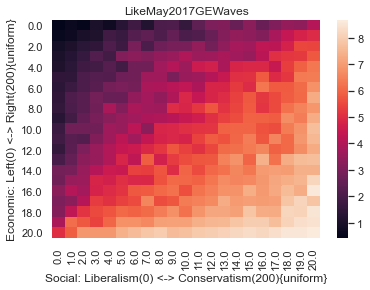

In [240]:
df = pd.concat([likeMay,pan_dataset_allr_values.set_index("id")[pan_dataset_allr_values.columns[1:3]]],axis=1)
df['wt'] = BES_Panel["wt_new_W19_result"]
df[pan_dataset_allr_values.columns[1:3]] = (df[pan_dataset_allr_values.columns[1:3]]/10).round()
sns.heatmap(df.groupby(['Economic: Left(0) <-> Right(200){uniform}', 'Social: Liberalism(0) <-> Conservatism(200){uniform}'])[0].mean().unstack('Social: Liberalism(0) <-> Conservatism(200){uniform}'))
plt.title("LikeMay2017GEWaves");

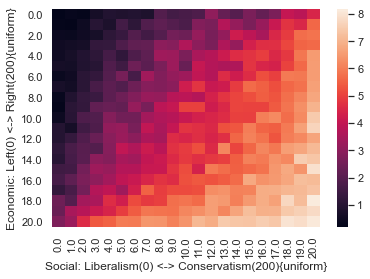

In [237]:
df = pd.concat([likeJohnson18,pan_dataset_allr_values.set_index("id")[pan_dataset_allr_values.columns[1:3]]],axis=1)
df['wt'] = BES_Panel["wt_new_W19_result"]
df[pan_dataset_allr_values.columns[1:3]] = (df[pan_dataset_allr_values.columns[1:3]]/10).round()
sns.heatmap(df.groupby(['Economic: Left(0) <-> Right(200){uniform}', 'Social: Liberalism(0) <-> Conservatism(200){uniform}'])[0].mean().unstack('Social: Liberalism(0) <-> Conservatism(200){uniform}'))

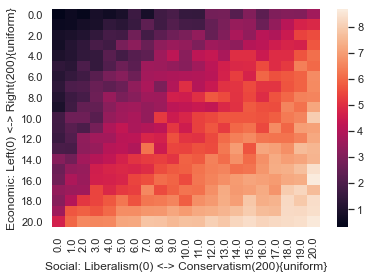

In [238]:
df = pd.concat([likeMay12,pan_dataset_allr_values.set_index("id")[pan_dataset_allr_values.columns[1:3]]],axis=1)
df['wt'] = BES_Panel["wt_new_W19_result"]
df[pan_dataset_allr_values.columns[1:3]] = (df[pan_dataset_allr_values.columns[1:3]]/10).round()
sns.heatmap(df.groupby(['Economic: Left(0) <-> Right(200){uniform}', 'Social: Liberalism(0) <-> Conservatism(200){uniform}'])[0].mean().unstack('Social: Liberalism(0) <-> Conservatism(200){uniform}'))

In [2]:
def surridge_lr_scale(x,centre_cutoff,right_cutoff):
    if pd.isnull(x):
        return np.nan
    
    if x<centre_cutoff:
        return "Left"
    elif x<right_cutoff:
        return "Centre"
    else:
        return "Right"
    
def surridge_al_scale(x,centre_cutoff,right_cutoff):
    if pd.isnull(x):
        return np.nan
    
    if x<centre_cutoff:
        return "Liberal"
    elif x<right_cutoff:
        return "Moderate"
    else:
        return "Authoritarian"

al_lr_scale = BES_Panel[["lr_scaleW17","al_scaleW17"]].apply(lambda x: x.cat.codes).replace(-1,np.nan)    
al_lr_scale["lr_scaleW17"] = al_lr_scale["lr_scaleW17"].apply(lambda x: surridge_lr_scale(x, 6,11 ) )
al_lr_scale["al_scaleW17"] = al_lr_scale["al_scaleW17"].apply(lambda x: surridge_al_scale(x, 10,15 ) )



cats = (al_lr_scale["lr_scaleW17"]+"-"+al_lr_scale["al_scaleW17"]).astype('category')

cats = cats.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',],ordered=True)


wts = BES_Panel["wt_new_W17"]
mask = cats.notnull() & wts.notnull()
wvc = weighted_value_counts(cats[mask],wts[mask],normalize=True, perc=True,decimal_places=0)\
    .sort_index()["weighted_sample_percentage"]


cats = cats.cat.rename_categories([x+"-("+str(wvc[x])+"%)" for x in cats.cat.categories])

In [22]:
# search(BES_Panel,"al_scale",mask = BES_Panel["likeMayW12"].notnull())

al_scaleW1_W5      16928
al_scaleW6         15648
al_scaleW7_W9      22375
al_scaleW10_W12    22214
al_scaleW13        23295
al_scaleW14W15     18374
al_scaleW16        12847
al_scaleW17        13945
dtype: int64

In [3]:
likeJohnson = BES_Panel[["likeJohnsonW17","likeJohnsonW18","likeJohnsonW19"]].replace("Don't know",np.nan).fillna(method='bfill',axis=1)["likeJohnsonW17"].cat.codes.replace(-1,np.nan)

likeJohnson18 = BES_Panel["likeJohnsonW18"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

likeCon = BES_Panel[["likeConW17","likeConW18","likeConW19"]].replace("Don't know",np.nan).fillna(method='bfill',axis=1)["likeConW17"].cat.codes.replace(-1,np.nan)

likeMay = BES_Panel[["likeMayW11","likeMayW12","likeMayW13"]].replace("Don't know",np.nan).fillna(method='bfill',axis=1)["likeMayW11"].cat.codes.replace(-1,np.nan)

likeMay12 = BES_Panel["likeMayW12"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)



In [51]:
search(BES_Panel,"wt_full_W5")

wt_full_W5    30725
dtype: int64

In [92]:
likeCorbyn18 = BES_Panel["likeCorbynW18"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
likeCorbyn12 = BES_Panel["likeCorbynW12"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

In [109]:
likeJohnson18_wts = pd.Series(list(zip(likeJohnson18,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)

df = pd.concat([cats,likeJohnson18_wts],axis=1)
df.columns = ["Surridge Value Groups","likeOutOf10"]
df["Politician"] = "Johnson19"

likeMay12_wts = pd.Series(list(zip(likeMay12,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)

df2 = pd.concat([cats,likeMay12_wts],axis=1)
df2.columns = ["Surridge Value Groups","likeOutOf10"]
df2["Politician"] = "May17"
df = df.append(df2)

likeCorbyn18_wts = pd.Series(list(zip(likeCorbyn18,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)

df2 = pd.concat([cats,likeCorbyn18_wts],axis=1)
df2.columns = ["Surridge Value Groups","likeOutOf10"]
df2["Politician"] = "Corbyn19"
df = df.append(df2)

likeCorbyn12_wts = pd.Series(list(zip(likeCorbyn12,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)

df2 = pd.concat([cats,likeCorbyn12_wts],axis=1)
df2.columns = ["Surridge Value Groups","likeOutOf10"]
df2["Politician"] = "Corbyn17"
df = df.append(df2)

likeCameron5 = BES_Panel["likeCameronW5"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
likeCameron5_wts = pd.Series(list(zip(likeCameron5,BES_Panel["wt_full_W5"])),index=BES_Panel.index)

df2 = pd.concat([cats,likeCameron5_wts],axis=1)
df2.columns = ["Surridge Value Groups","likeOutOf10"]
df2["Politician"] = "Cameron15"
df = df.append(df2)

likeMiliband5 = BES_Panel["likeMilibandW5"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
likeMiliband5_wts = pd.Series(list(zip(likeMiliband5,BES_Panel["wt_full_W5"])),index=BES_Panel.index)

df2 = pd.concat([cats,likeMiliband5_wts],axis=1)
df2.columns = ["Surridge Value Groups","likeOutOf10"]
df2["Politician"] = "Miliband15"
df = df.append(df2)


In [110]:
df

,Surridge Value Groups,likeOutOf10,Politician
id,,,
1,NaN,"(nan, nan)",Johnson19
2,NaN,"(7.0, 0.4711800146793187)",Johnson19
3,NaN,"(nan, 0.34683073111854035)",Johnson19
4,NaN,"(nan, nan)",Johnson19
5,NaN,"(nan, nan)",Johnson19
...,...,...,...
98447,Right-Liberal-(3%),"(nan, nan)",Miliband15
98448,Right-Liberal-(3%),"(nan, nan)",Miliband15
98449,Centre-Liberal-(7%),"(nan, nan)",Miliband15


Wall time: 33.6 s


Text(0.5, 1.0, "Cameron, May and Johnson's popularity with each Value Group\n(From the respective GE15, GE17 and GE19 campaign waves)")

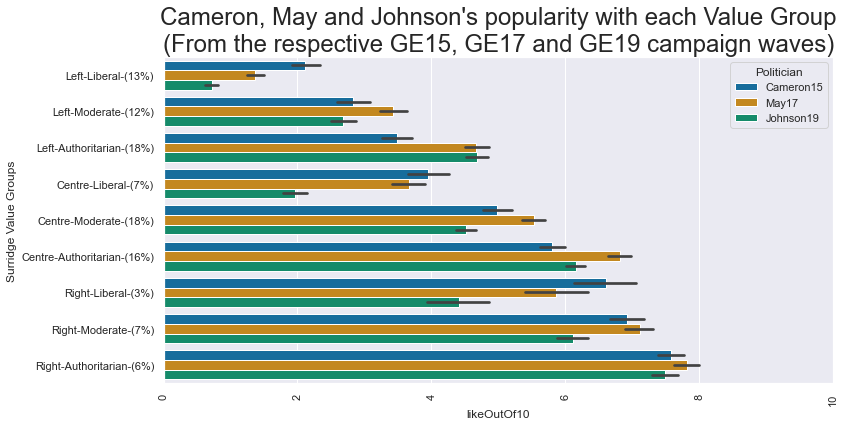

In [111]:
%%time
plt.figure(figsize=(12,6));
sns.barplot(data =df[df["Politician"].isin(["Johnson19","May17","Cameron15"])], y="Surridge Value Groups", x="likeOutOf10",
            hue="Politician",estimator=weighted_mean,orient='h',
           hue_order = ["Cameron15","May17","Johnson19",])
# cats
plt.xticks(rotation=90);
plt.xlim([0,10]);
plt.title("Cameron, May and Johnson's popularity with each Value Group\n(From the respective GE15, GE17 and GE19 campaign waves)",fontsize=24)
# BUG IN SEABORN

## had to change code in ~ line 157
# E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\Lib\site-packages\seaborn\categorical.py

#             if orient is None:
#                 # Figure out the plotting orientation Is this updating?
#                 orient = infer_orient(
#                     x, y, orient, require_numeric=self.require_numeric
#                 )
#             else:
#                 orient = "h" if str(orient).startswith("h") else "v"

Wall time: 33.7 s


Text(0.5, 1.0, "Corbyn and Miliband's popularity with each Value Group\n(From the respective GE15, GE17 and GE19 campaign waves)")

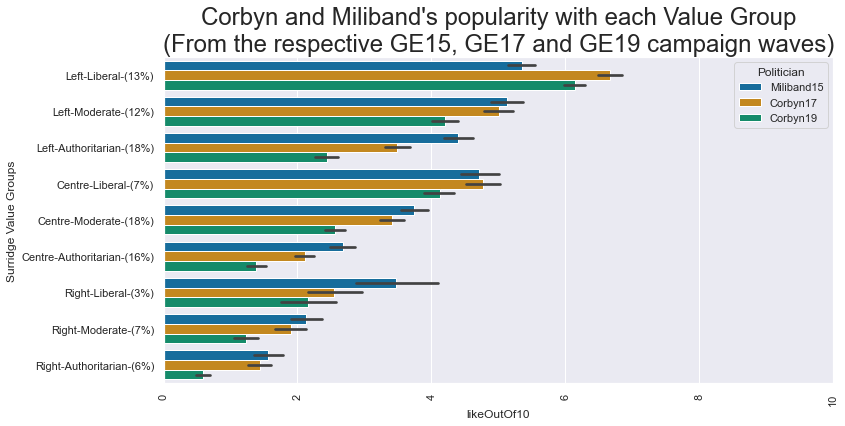

In [112]:
%%time
plt.figure(figsize=(12,6));
sns.barplot(data =df[df["Politician"].isin(["Corbyn19","Corbyn17","Miliband15"])], y="Surridge Value Groups", x="likeOutOf10",hue="Politician"
            ,estimator=weighted_mean,orient='h',hue_order = ["Miliband15","Corbyn17","Corbyn19"])

# cats
plt.xticks(rotation=90);
plt.xlim([0,10]);
plt.title("Corbyn and Miliband's popularity with each Value Group\n(From the respective GE15, GE17 and GE19 campaign waves)",fontsize=24)

In [27]:
## Add Corbyn in both elections!


In [ ]:
# Nice sime comparison between Johnson and May, based on voter group 15-17, 17-19

# UKIP&BXP&BNP,CON,LAB&LD&GRN&PC&SNP,DNV&DK&OTH

# Then add breakdown by EE2019 vote



In [86]:
replace_dict = {"BXP":"BXP&UKIP&BNP","UKIP":"BXP&UKIP&BNP","BNP":"BXP&UKIP&BNP",
                 "LAB":"LIBLEFT","LD":"LIBLEFT","GP":"LIBLEFT","PC":"LIBLEFT","SNP":"LIBLEFT","TIG":"LIBLEFT",
                 "DNV":"DNV&DK&OTH","DK":"DNV&DK&OTH","OTH":"DNV&DK&OTH",
                 "UNK":np.nan,"TYTV(Def)":np.nan,"TYTV(Maybe)":np.nan}
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

In [ ]:
pan_dataset_votes[["2017GEVote_complete","2019EEVote_complete","2019GEVote_complete"]].replace({"BXP":"BXP&UKIP","UKIP":"BXP&UKIP"}).apply(lambda x: "|".join(x),axis=1)

In [118]:
Outflow_2019Con  = pan_dataset_votes["2019GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2017GEVote_complete"]=="CON"]
# Outflow_2019.value_counts()

Outflow_2017Con  = pan_dataset_votes["2017GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2015GEVote_complete"]=="CON"]
# Outflow_2017.value_counts()

Outflow_2015Con  = pan_dataset_votes["2015GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2010GEVote_complete"]=="CON"]
# Outflow_2015.value_counts()

Inflow_2019Con  = pan_dataset_votes["2017GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2019GEVote_complete"]=="CON"]
# Inflow_2019.value_counts()

Inflow_2017Con  = pan_dataset_votes["2015GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2017GEVote_complete"]=="CON"]
# Inflow_2017.value_counts()

Inflow_2015Con  = pan_dataset_votes["2010GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2015GEVote_complete"]=="CON"]
# Inflow_2015.value_counts()

In [119]:
Outflow_2019Lab  = pan_dataset_votes["2019GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2017GEVote_complete"]=="LAB"]
# Outflow_2019.value_counts()

Outflow_2017Lab  = pan_dataset_votes["2017GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2015GEVote_complete"]=="LAB"]
# Outflow_2017.value_counts()

Outflow_2015Lab  = pan_dataset_votes["2015GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2010GEVote_complete"]=="LAB"]
# Outflow_2015.value_counts()

Inflow_2019Lab  = pan_dataset_votes["2017GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2019GEVote_complete"]=="LAB"]
# Inflow_2019.value_counts()

Inflow_2017Lab  = pan_dataset_votes["2015GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2017GEVote_complete"]=="LAB"]
# Inflow_2017.value_counts()

Inflow_2015Lab  = pan_dataset_votes["2010GEVote_complete"].replace(replace_dict)[pan_dataset_votes["2015GEVote_complete"]=="LAB"]
# Inflow_2015.value_counts()

In [43]:
likeJohnson18_wts = pd.Series(list(zip(likeJohnson18,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)

df = pd.concat([Inflow_2019,likeJohnson18_wts],axis=1)
df.columns = ["Vote In Previous GE","likeOutOf10"]
df["Politician"] = "Johnson19"

likeMay12_wts = pd.Series(list(zip(likeMay12,BES_Panel["wt_new_W13_result"])),index=BES_Panel.index)

df2 = pd.concat([Inflow_2017,likeMay12_wts],axis=1)
df2.columns = ["Vote In Previous GE","likeOutOf10"]
df2["Politician"] = "May17"
df = df.append(df2)

Wall time: 27.3 s


Text(0.5, 1.0, "May and Johnson's popularity with each Voter Group\n(From the respective GE17 and GE19 campaign waves)")

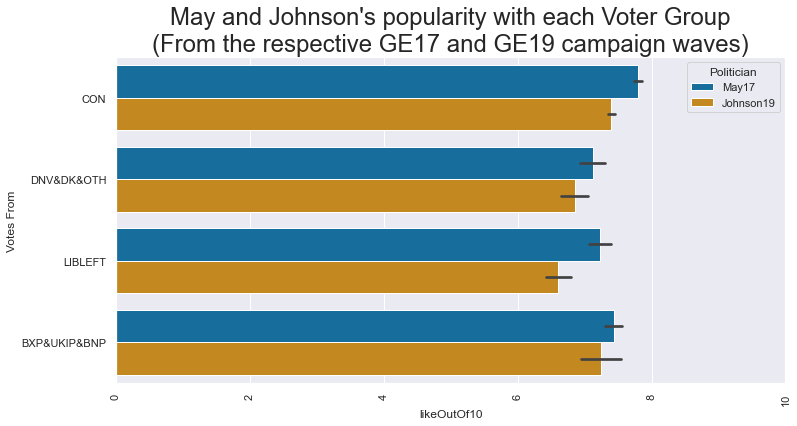

In [44]:
%%time
plt.figure(figsize=(12,6));
sns.barplot(data =df[df["Politician"].isin(["Johnson19","May17"])], y="Vote In Previous GE", x="likeOutOf10",hue="Politician",estimator=weighted_mean,orient='h',
           hue_order = ["May17","Johnson19"])
# cats
plt.xticks(rotation=90);
plt.xlim([0,10]);
plt.title("May and Johnson's popularity with 2017/2019 Con Voters\nBroken Down By Where Those Voters Came From",fontsize=24)

In [61]:
likeJohnson18_wts = pd.Series(list(zip(likeJohnson18,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)

df = pd.concat([Inflow_2019,likeJohnson18_wts],axis=1)
df.columns = ["Vote In Previous GE","likeOutOf10"]
df["Politician"] = "Johnson19"

likeMay12_wts = pd.Series(list(zip(likeMay12,BES_Panel["wt_new_W13_result"])),index=BES_Panel.index)

df2 = pd.concat([Inflow_2017,likeMay12_wts],axis=1)
df2.columns = ["Vote In Previous GE","likeOutOf10"]
df2["Politician"] = "May17"
df = df.append(df2)

likeCameron5 = BES_Panel["likeCameronW5"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
likeCameron5_wts = pd.Series(list(zip(likeCameron5,BES_Panel["wt_full_W5"])),index=BES_Panel.index)

df2 = pd.concat([Inflow_2015,likeCameron5_wts],axis=1)
df2.columns = ["Vote In Previous GE","likeOutOf10"]
df2["Politician"] = "Cameron15"
df = df.append(df2)

Wall time: 40.8 s


Text(0.5, 1.0, "Cameron, May and Johnson's popularity with 2015/2017/2019 Con Voters\nBroken Down By Where Those Voters Came From")

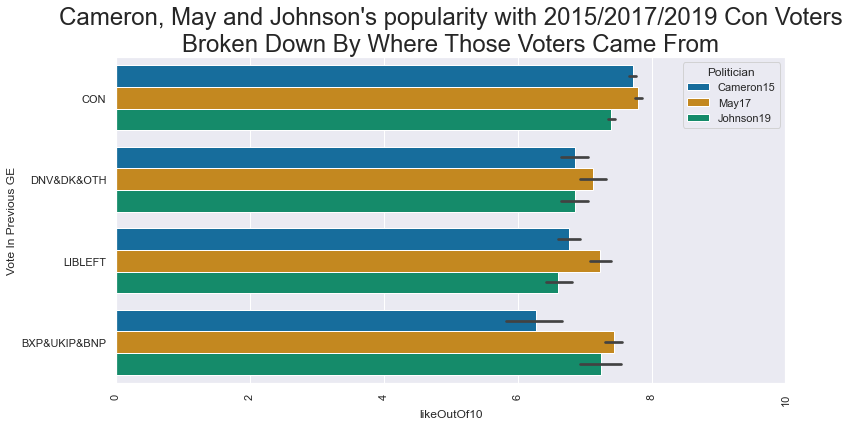

In [62]:
%%time
plt.figure(figsize=(12,6));
sns.barplot(data =df[df["Politician"].isin(["Cameron15","Johnson19","May17"])], y="Vote In Previous GE", x="likeOutOf10",hue="Politician",estimator=weighted_mean,orient='h',
           hue_order = ["Cameron15","May17","Johnson19"])
# cats
plt.xticks(rotation=90);
plt.xlim([0,10]);
plt.title("Cameron, May and Johnson's popularity with 2015/2017/2019 Con Voters\nBroken Down By Where Those Voters Came From",fontsize=24)

In [87]:
Inflow_2019_fromEE  = pan_dataset_votes["2019EEVote_complete"].replace(replace_dict)[pan_dataset_votes["2019GEVote_complete"]=="CON"]
Inflow_2019_fromEE.value_counts()

BXP&UKIP&BNP    6710
DNV&DK&OTH      2243
CON             1341
LIBLEFT          833
Name: 2019EEVote_complete, dtype: int64

In [88]:
Inflow_2014_fromEE  = pan_dataset_votes["2014EEVote_complete"].replace(replace_dict)[pan_dataset_votes["2015GEVote_complete"]=="CON"]
Inflow_2014_fromEE.value_counts()

CON             2935
BXP&UKIP&BNP    1960
DNV&DK&OTH      1805
LIBLEFT          486
Name: 2014EEVote_complete, dtype: int64

In [89]:
likeJohnson18_wts = pd.Series(list(zip(likeJohnson18,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)

df = pd.concat([Inflow_2019_fromEE,likeJohnson18_wts],axis=1)
df.columns = ["Vote In Previous EE","likeOutOf10"]
df["Politician"] = "Johnson19"

# likeMay12_wts = pd.Series(list(zip(likeMay12,BES_Panel["wt_new_W13_result"])),index=BES_Panel.index)

# df2 = pd.concat([Inflow_2017,likeMay12_wts],axis=1)
# df2.columns = ["Vote In Previous GE","likeOutOf10"]
# df2["Politician"] = "May17"
# df = df.append(df2)

likeCameron5 = BES_Panel["likeCameronW5"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
likeCameron5_wts = pd.Series(list(zip(likeCameron5,BES_Panel["wt_full_W5"])),index=BES_Panel.index)

df2 = pd.concat([Inflow_2014_fromEE,likeCameron5_wts],axis=1)
df2.columns = ["Vote In Previous EE","likeOutOf10"]
df2["Politician"] = "Cameron15"
df = df.append(df2)

Wall time: 7.62 s


Text(0.5, 1.0, "Cameron and Johnson's popularity with 2015/2019 Con Voters\nBroken Down By Preceding Euro Election")

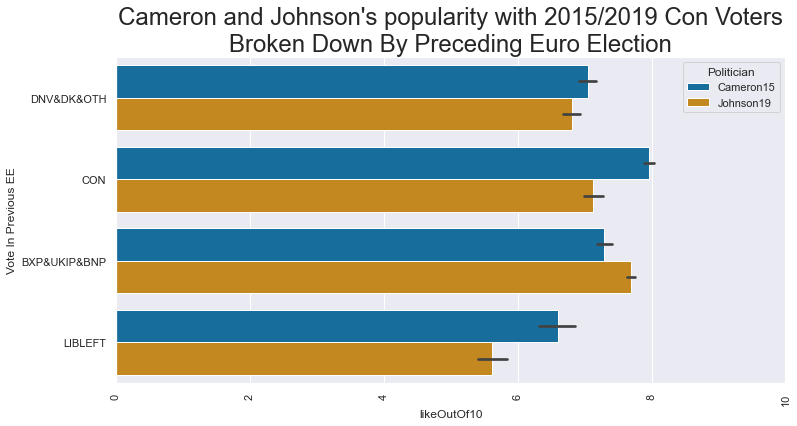

In [90]:
%%time
plt.figure(figsize=(12,6));
sns.barplot(data =df[df["Politician"].isin(["Cameron15","Johnson19"])], y="Vote In Previous EE", x="likeOutOf10",hue="Politician",estimator=weighted_mean,orient='h',
           hue_order = ["Cameron15","Johnson19"])
# cats
plt.xticks(rotation=90);
plt.xlim([0,10]);
plt.title("Cameron and Johnson's popularity with 2015/2019 Con Voters\nBroken Down By Preceding Euro Election",fontsize=24)

In [ ]:
### just heard steve richards repeat the Wrongness that 'only Johnson could build the coalition'!

In [ ]:
### check out inflow/outflow of voters for all politicians

In [131]:
col_name = "Vote In Previous GE"
break_var_dictCON = {19:Inflow_2019Con,17:Inflow_2017Con,15:Inflow_2015Con}
break_var_dictLAB = {19:Inflow_2019Lab,17:Inflow_2017Lab,15:Inflow_2015Lab}
# break_var_dictCON = {19:Outflow_2019Con,17:Outflow_2017Con,15:Outflow_2015Con}
# break_var_dictLAB = {19:Outflow_2019Lab,17:Outflow_2017Lab,15:Outflow_2015Lab}

likeJohnson18_wts = pd.Series(list(zip(likeJohnson18,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)
ge = 19
df = pd.concat([break_var_dictCON[ge],likeJohnson18_wts],axis=1)
df.columns = [col_name,"likeOutOf10"]
df["Politician"] = "Johnson19"

likeMay12_wts = pd.Series(list(zip(likeMay12,BES_Panel["wt_new_W13_result"])),index=BES_Panel.index)
ge = 17
df2 = pd.concat([break_var_dictCON[ge],likeMay12_wts],axis=1)
df2.columns = [col_name,"likeOutOf10"]
df2["Politician"] = "May17"
df = df.append(df2)

likeCameron5 = BES_Panel["likeCameronW5"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
likeCameron5_wts = pd.Series(list(zip(likeCameron5,BES_Panel["wt_full_W5"])),index=BES_Panel.index)
ge = 15
df2 = pd.concat([break_var_dictCON[ge],likeCameron5_wts],axis=1)
df2.columns = [col_name,"likeOutOf10"]
df2["Politician"] = "Cameron15"
df = df.append(df2)


likeCorbyn18_wts = pd.Series(list(zip(likeCorbyn18,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)
ge = 19
df2 = pd.concat([break_var_dictLAB[ge],likeCorbyn18_wts],axis=1)
df2.columns = [col_name,"likeOutOf10"]
df2["Politician"] = "Corbyn19"
df = df.append(df2)

likeCorbyn12_wts = pd.Series(list(zip(likeCorbyn12,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)
ge = 17
df2 = pd.concat([break_var_dictLAB[ge],likeCorbyn12_wts],axis=1)
df2.columns = [col_name,"likeOutOf10"]
df2["Politician"] = "Corbyn17"
df = df.append(df2)

likeMiliband5 = BES_Panel["likeMilibandW5"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
likeMiliband5_wts = pd.Series(list(zip(likeMiliband5,BES_Panel["wt_full_W5"])),index=BES_Panel.index)
ge = 15
df2 = pd.concat([break_var_dictLAB[ge],likeMiliband5_wts],axis=1)
df2.columns = [col_name,"likeOutOf10"]
df2["Politician"] = "Miliband15"
df = df.append(df2)

Wall time: 41 s


Text(0.5, 1.0, "Cameron, May and Johnson's popularity with 2015/2017/2019 Voters\nWho Had Voted Con In The Previous GE")

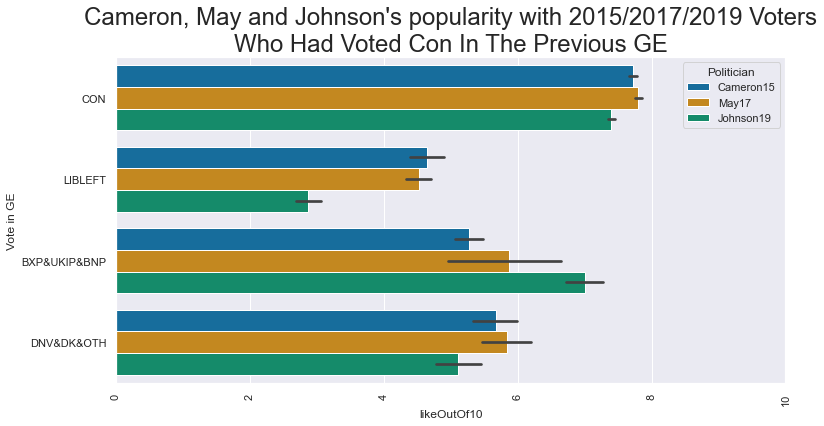

In [129]:
%%time
plt.figure(figsize=(12,6));
pol_list = ["Cameron15","May17","Johnson19"]
sns.barplot(data =df[df["Politician"].isin(pol_list)], y="Vote In Previous GE", x="likeOutOf10",hue="Politician",estimator=weighted_mean,orient='h',
           hue_order = pol_list)
# cats
plt.ylabel("Vote in GE");
plt.xticks(rotation=90);
plt.xlim([0,10]);
plt.title("Cameron, May and Johnson's popularity with 2015/2017/2019 Voters\nWho Had Voted Con In The Previous GE",fontsize=24);

Wall time: 32.6 s


Text(0.5, 1.0, "Miliband and Corbyn's popularity with 2015/2017/2019 Voters\nWho Had Voted Lab In The Previous GE")

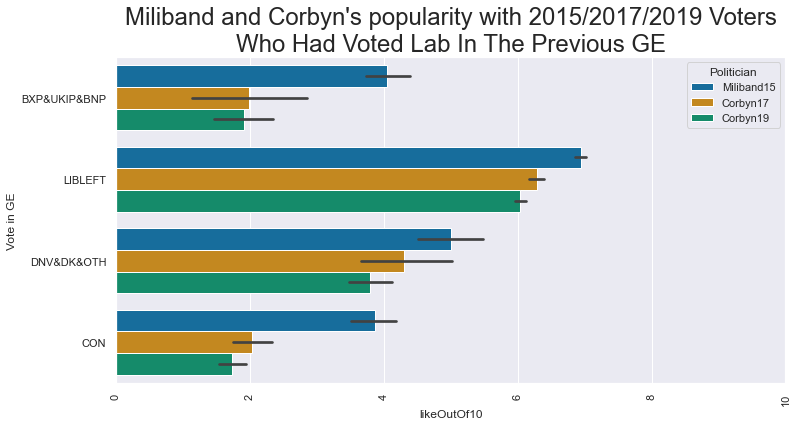

In [130]:
%%time
pol_list = ["Miliband15","Corbyn17","Corbyn19"]
plt.figure(figsize=(12,6));
sns.barplot(data =df[df["Politician"].isin(pol_list)], y="Vote In Previous GE", x="likeOutOf10",hue="Politician",estimator=weighted_mean,orient='h',
           hue_order = pol_list)
plt.ylabel("Vote in GE");
plt.xticks(rotation=90);
plt.xlim([0,10]);
plt.title("Miliband and Corbyn's popularity with 2015/2017/2019 Voters\nWho Had Voted Lab In The Previous GE",fontsize=24);

Wall time: 43.6 s


Text(0.5, 1.0, "Cameron, May and Johnson's popularity with 2015/2017/2019 Con Voters\nBroken Down By Where Those Voters Came From")

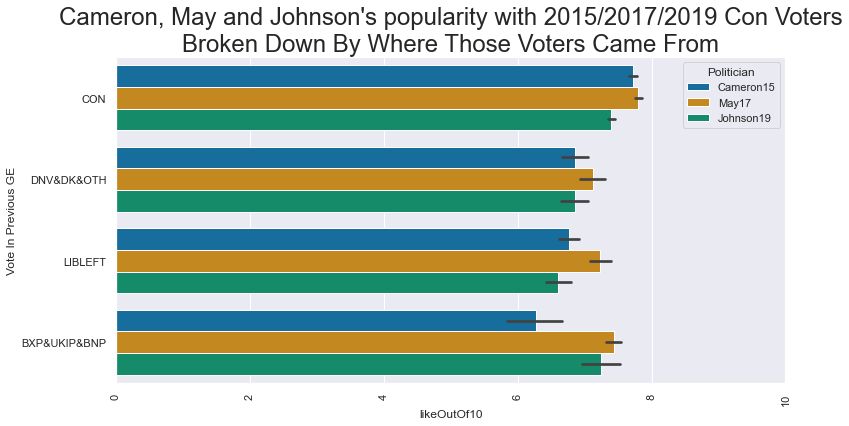

In [132]:
%%time
plt.figure(figsize=(12,6));
pol_list = ["Cameron15","May17","Johnson19"]
sns.barplot(data =df[df["Politician"].isin(pol_list)], y="Vote In Previous GE", x="likeOutOf10",hue="Politician",estimator=weighted_mean,orient='h',
           hue_order = pol_list)
# cats
# plt.ylabel("Vote in GE");
plt.xticks(rotation=90);
plt.xlim([0,10]);
plt.title("Cameron, May and Johnson's popularity with 2015/2017/2019 Con Voters\nBroken Down By Where Those Voters Came From",fontsize=24);

Wall time: 40 s


Text(0.5, 1.0, "Miliband and Corbyn's popularity with 2015/2017/2019 Lab Voters\nBroken Down By Where Those Voters Came From")

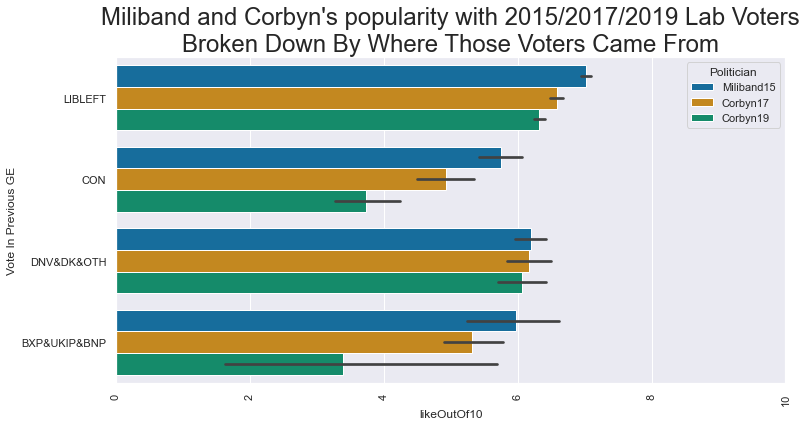

In [134]:
%%time
plt.figure(figsize=(12,6));
pol_list = ["Miliband15","Corbyn17","Corbyn19"]
sns.barplot(data =df[df["Politician"].isin(pol_list)], y="Vote In Previous GE", x="likeOutOf10",hue="Politician",estimator=weighted_mean,orient='h',
           hue_order = pol_list)
# cats
# plt.ylabel("Vote in GE");
plt.xticks(rotation=90);
plt.xlim([0,10]);
plt.title("Miliband and Corbyn's popularity with 2015/2017/2019 Lab Voters\nBroken Down By Where Those Voters Came From",fontsize=24);

In [83]:

## 2016 and 2017 together????

pan_dataset_votes["2017LE_complete"][pan_dataset_votes["2017GEVote_complete"]=="CON"].value_counts()

UNK            13115
CON             3919
CNV             3420
DNV             1885
OTH              433
LD               281
UKIP             221
LAB              213
TYTV(Maybe)      115
GP                48
DK                46
PC                30
SNP                9
TYTV(Def)          0
Not Present        0
Name: 2017LE_complete, dtype: int64

In [135]:
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')

In [142]:
pan_dataset_allr_values['Economic: Left <-> Right{gaussian-ish}complete']

id
1       -1.913311
2        1.929016
3       -0.313073
4        0.643054
5        1.004469
           ...   
98447    0.217387
98448    0.791833
98449   -0.789732
98450   -0.056723
98451   -0.351287
Name: Economic: Left <-> Right{gaussian-ish}complete, Length: 97006, dtype: float64

In [145]:
pan_dataset_allr_values.columns

Index(['Economic: Left(0) <-> Right(200){uniform}',
       'Social: Liberalism(0) <-> Conservatism(200){uniform}',
       'Economic: Left <-> Right{gaussian-ish}',
       'Social: Liberalism <-> Conservatism{gaussian-ish}',
       'Economic: Left <-> Right{gaussian-ish}completish',
       'Economic: Left <-> Right{gaussian-ish}complete',
       'Social: Liberalism <-> Conservatism{gaussian-ish}completish',
       'Social: Liberalism <-> Conservatism{gaussian-ish}complete',
       'Economic: Left <-> Right{gaussian-ish}complete_fully',
       'Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'],
      dtype='object')

In [207]:
lr_col = 'Economic: Left <-> Right{gaussian-ish}complete'
al_col = 'Social: Liberalism <-> Conservatism{gaussian-ish}complete'

wt_col = "wt_new_W19_result"
mask = pan_dataset_allr_values[lr_col].notnull()&pan_dataset_allr_values[al_col].notnull()&BES_Panel[wt_col].notnull()
lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_col][mask],3)
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_col][mask],3)
lr = lr.cat.rename_categories(["Left","Centre","Right"]).astype(str)
al = al.cat.rename_categories(["Liberal","Moderate","Authoritarian"]).astype(str)
cats19 = (lr+"-"+al).astype('category')
cats = pd.Series(index=BES_Panel.index)
cats.loc[cats19.index] = cats19
cats19=cats.astype('category')
cats19 = cats19.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',],ordered=True)
cats19.name = 'cats19'
# wvc = weighted_value_counts(cats19[mask],BES_Panel[wt_col][mask],normalize=True, perc=True,decimal_places=0)\
#     .sort_index()["weighted_sample_percentage"]
# cats19 = cats19.cat.rename_categories([x+"-("+str(wvc[x])+"%)" for x in cats19.cat.categories])


wt_col = "wt_new_W13_result"
mask = pan_dataset_allr_values[lr_col].notnull()&pan_dataset_allr_values[al_col].notnull()&BES_Panel[wt_col].notnull()
lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_col][mask],3)
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_col][mask],3)
lr = lr.cat.rename_categories(["Left","Centre","Right"]).astype(str)
al = al.cat.rename_categories(["Liberal","Moderate","Authoritarian"]).astype(str)
cats17 = (lr+"-"+al).astype('category')
cats = pd.Series(index=BES_Panel.index)
cats.loc[cats17.index] = cats17
cats17=cats.astype('category')
cats17 = cats17.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',],ordered=True)
cats17.name = 'cats17'
# wvc = weighted_value_counts(cats17[mask],BES_Panel[wt_col][mask],normalize=True, perc=True,decimal_places=0)\
#     .sort_index()["weighted_sample_percentage"]
# cats17 = cats17.cat.rename_categories([x+"-("+str(wvc[x])+"%)" for x in cats17.cat.categories])



wt_col = "wt_full_W5"
mask = pan_dataset_allr_values[lr_col].notnull()&pan_dataset_allr_values[al_col].notnull()&BES_Panel[wt_col].notnull()
lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel[wt_col][mask],3)
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel[wt_col][mask],3)
lr = lr.cat.rename_categories(["Left","Centre","Right"]).astype(str)
al = al.cat.rename_categories(["Liberal","Moderate","Authoritarian"]).astype(str)
cats15 = (lr+"-"+al).astype('category')
cats = pd.Series(index=BES_Panel.index)
cats.loc[cats15.index] = cats15
cats15=cats.astype('category')
cats15 = cats15.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',],ordered=True)
cats15.name = 'cats15'
# wvc = weighted_value_counts(cats15[mask],BES_Panel[wt_col][mask],normalize=True, perc=True,decimal_places=0)\
#     .sort_index()["weighted_sample_percentage"]
# cats15 = cats15.cat.rename_categories([x+"-("+str(wvc[x])+"%)" for x in cats15.cat.categories])



In [186]:
# cats15.loc[list(set(BES_Panel.index)-set(cats15.index))]

# list(set(BES_Panel.index)-set(cats15.index))

In [208]:
likeJohnson18_wts = pd.Series(list(zip(likeJohnson18,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)

df = pd.concat([cats19,likeJohnson18_wts],axis=1)
df.columns = ["Surridge Value Groups","likeOutOf10"]
df["Politician"] = "Johnson19"

likeMay12_wts = pd.Series(list(zip(likeMay12,BES_Panel["wt_new_W13_result"])),index=BES_Panel.index)

df2 = pd.concat([cats17,likeMay12_wts],axis=1)
df2.columns = ["Surridge Value Groups","likeOutOf10"]
df2["Politician"] = "May17"
df = df.append(df2)

likeCorbyn18_wts = pd.Series(list(zip(likeCorbyn18,BES_Panel["wt_new_W19_result"])),index=BES_Panel.index)

df2 = pd.concat([cats19,likeCorbyn18_wts],axis=1)
df2.columns = ["Surridge Value Groups","likeOutOf10"]
df2["Politician"] = "Corbyn19"
df = df.append(df2)

likeCorbyn12_wts = pd.Series(list(zip(likeCorbyn12,BES_Panel["wt_new_W13_result"])),index=BES_Panel.index)

df2 = pd.concat([cats17,likeCorbyn12_wts],axis=1)
df2.columns = ["Surridge Value Groups","likeOutOf10"]
df2["Politician"] = "Corbyn17"
df = df.append(df2)

likeCameron5 = BES_Panel["likeCameronW5"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
likeCameron5_wts = pd.Series(list(zip(likeCameron5,BES_Panel["wt_full_W5"])),index=BES_Panel.index)

df2 = pd.concat([cats15,likeCameron5_wts],axis=1)
df2.columns = ["Surridge Value Groups","likeOutOf10"]
df2["Politician"] = "Cameron15"
df = df.append(df2)

likeMiliband5 = BES_Panel["likeMilibandW5"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
likeMiliband5_wts = pd.Series(list(zip(likeMiliband5,BES_Panel["wt_full_W5"])),index=BES_Panel.index)

df2 = pd.concat([cats15,likeMiliband5_wts],axis=1)
df2.columns = ["Surridge Value Groups","likeOutOf10"]
df2["Politician"] = "Miliband15"
df = df.append(df2)


In [206]:
df.groupby("Politician")["likeOutOf10"].apply(lambda x: weighted_mean(x))

,Surridge Value Groups,likeOutOf10,Politician
id,,,
1,NaN,"(nan, nan)",Johnson19
2,Right-Liberal-(11%),"(7.0, 0.4711800146793187)",Johnson19
3,Centre-Moderate-(12%),"(nan, 0.34683073111854035)",Johnson19
4,NaN,"(nan, nan)",Johnson19
5,NaN,"(nan, nan)",Johnson19
...,...,...,...
98447,NaN,"(nan, nan)",Miliband15
98448,NaN,"(nan, nan)",Miliband15
98449,NaN,"(nan, nan)",Miliband15


Wall time: 36.7 s


Text(0.5, 1.0, "Cameron, May and Johnson's popularity with each Value Group\n(From the respective GE15, GE17 and GE19 campaign waves)")

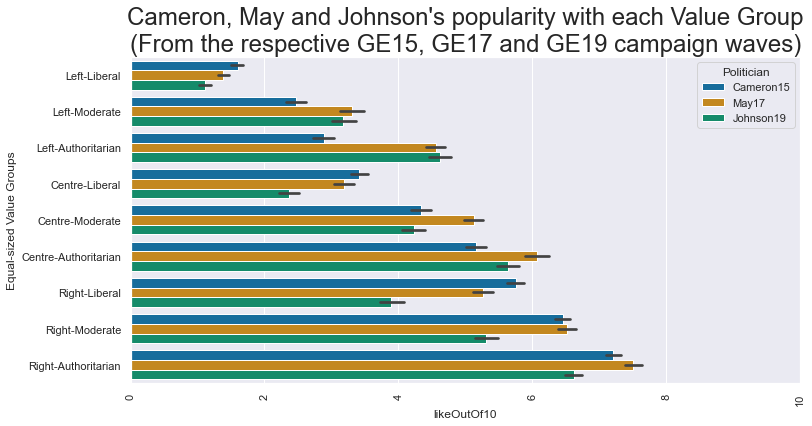

In [211]:
%%time
plt.figure(figsize=(12,6));
sns.barplot(data =df[df["Politician"].isin(["Johnson19","May17","Cameron15"])], y="Surridge Value Groups", x="likeOutOf10",
            hue="Politician",estimator=weighted_mean,orient='h',
           hue_order = ["Cameron15","May17","Johnson19",])
# cats
plt.ylabel("Equal-sized Value Groups");
plt.xticks(rotation=90);
plt.xlim([0,10]);
plt.title("Cameron, May and Johnson's popularity with each Value Group\n(From the respective GE15, GE17 and GE19 campaign waves)",fontsize=24)


Wall time: 36.7 s


Text(0.5, 1.0, "Corbyn and Miliband's popularity with each Value Group\n(From the respective GE15, GE17 and GE19 campaign waves)")

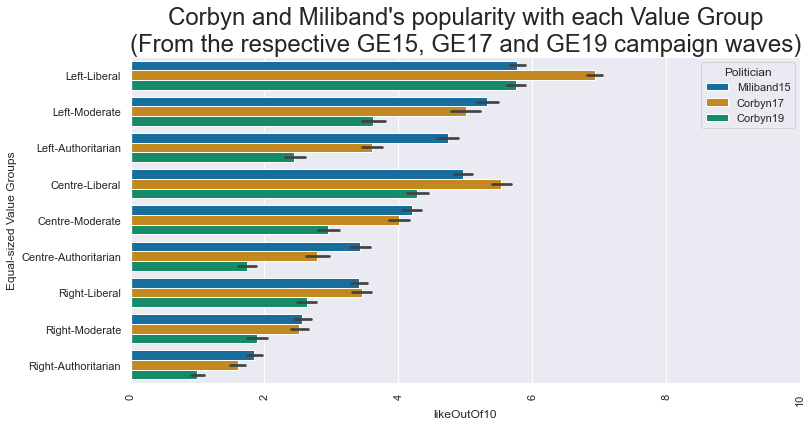

In [212]:
%%time
plt.figure(figsize=(12,6));
sns.barplot(data =df[df["Politician"].isin(["Corbyn19","Corbyn17","Miliband15"])], y="Surridge Value Groups", x="likeOutOf10",hue="Politician"
            ,estimator=weighted_mean,orient='h',hue_order = ["Miliband15","Corbyn17","Corbyn19"])

# cats
plt.ylabel("Equal-sized Value Groups");
plt.xticks(rotation=90);
plt.xlim([0,10]);
plt.title("Corbyn and Miliband's popularity with each Value Group\n(From the respective GE15, GE17 and GE19 campaign waves)",fontsize=24)